In [15]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
conn = duckdb.connect('testing.ddb')

In [17]:
conn.execute('''
    
    CREATE OR REPLACE TABLE ol_econ AS
    SELECT * FROM read_csv('olympics-economics.csv')
    WHERE gdp_year = 2023
    ORDER BY total DESC;

''')

In [18]:
conn.table('ol_econ').show()

┌───────────────┬──────────────┬───────┬────────┬────────┬───────┬──────────┬──────────┬────────────┐
│    country    │ country_code │ gold  │ silver │ bronze │ total │   gdp    │ gdp_year │ population │
│    varchar    │   varchar    │ int64 │ int64  │ int64  │ int64 │  double  │  int64   │   double   │
├───────────────┼──────────────┼───────┼────────┼────────┼───────┼──────────┼──────────┼────────────┤
│ United States │ USA          │    40 │     44 │     42 │   126 │ 81695.19 │     2023 │      334.9 │
│ China         │ CHN          │    40 │     27 │     24 │    91 │ 12614.06 │     2023 │     1410.7 │
│ Great Britain │ GBR          │    14 │     22 │     29 │    65 │  48866.6 │     2023 │       68.3 │
│ France        │ FRA          │    16 │     26 │     22 │    64 │ 44460.82 │     2023 │       68.2 │
│ Australia     │ AUS          │    18 │     19 │     16 │    53 │ 64711.77 │     2023 │       26.6 │
│ Japan         │ JPN          │    20 │     12 │     13 │    45 │ 33834.39 │     

In [19]:
df = conn.execute("""

    SELECT * FROM ol_econ 
    ORDER BY total DESC;

""").fetchdf()

In [20]:
display(df)

,country,country_code,gold,silver,bronze,total,gdp,gdp_year,population
0,United States,USA,40,44,42,126,81695.19,2023,334.9
1,China,CHN,40,27,24,91,12614.06,2023,1410.7
2,Great Britain,GBR,14,22,29,65,48866.60,2023,68.3
3,France,FRA,16,26,22,64,44460.82,2023,68.2
4,Australia,AUS,18,19,16,53,64711.77,2023,26.6
...,...,...,...,...,...,...,...,...,...
83,Ivory Coast,CIV,0,0,1,1,2728.80,2023,28.9
84,Peru,PER,0,0,1,1,7789.87,2023,34.4
85,Singapore,SGP,0,0,1,1,84734.26,2023,5.9
86,Slovakia,SVK,0,0,1,1,24470.24,2023,5.4


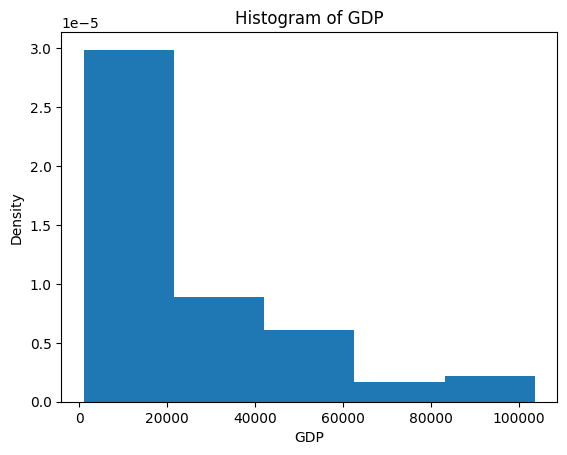

In [40]:
n_bins = 5
x = df['gdp']  # Selecting only the 'gdp' column for the histogram
plt.hist(x, bins=n_bins, density=True, histtype='bar')
plt.xlabel('GDP')
plt.ylabel('Density')
plt.title('Histogram of GDP')
plt.show()

In [25]:
display(x)

,country_code,gdp
0,USA,81695.19
1,CHN,12614.06
2,GBR,48866.60
3,FRA,44460.82
4,AUS,64711.77
...,...,...
83,CIV,2728.80
84,PER,7789.87
85,SGP,84734.26
86,SVK,24470.24
